In [1]:
#!pip install librerias en el venv
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importar librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Cargar el CSV
df = pd.read_csv("../data/bank-additional-full.csv", sep=";")

# Seleccionar columnas para características (X) y la columna objetivo (y)
columnas_usadas = ['age', 'job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'duration', 'campaign','previous','poutcome','euribor3m']
X = df[columnas_usadas]
y = df['y']

# Codificar variables categóricas
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)  # también codificamos la variable objetivo

# Dividir en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


C:\Users\david\AppData\Local\Temp\ipykernel_15492\1348803416.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\david\AppData\Local\Temp\ipykernel_15492\1348803416.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\david\AppData\Local\Temp\ipykernel_15492\1348803416.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [3]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10968
           1       0.66      0.52      0.58      1389

    accuracy                           0.92     12357
   macro avg       0.80      0.74      0.77     12357
weighted avg       0.91      0.92      0.91     12357

Accuracy: 0.9155134741442098


In [4]:
# Regresión Logística
log_model = LogisticRegression(max_iter=1000)  # Se aumenta el número de iteraciones por si tarda en converger
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("=== Regresión Logística ===")
print(classification_report(y_test, log_pred))
print("Accuracy:", accuracy_score(y_test, log_pred))

=== Regresión Logística ===
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.67      0.38      0.49      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357

Accuracy: 0.9096058913975884


c:\Users\david\OneDrive\Escritorio\ProyectoICC743\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# SVM
svm_model = SVC()  # Puedes especificar kernel='linear', 'rbf', etc.
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("=== SVM ===")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))

=== SVM ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10968
           1       0.62      0.18      0.28      1389

    accuracy                           0.90     12357
   macro avg       0.76      0.58      0.61     12357
weighted avg       0.87      0.90      0.87     12357

Accuracy: 0.8955248037549567


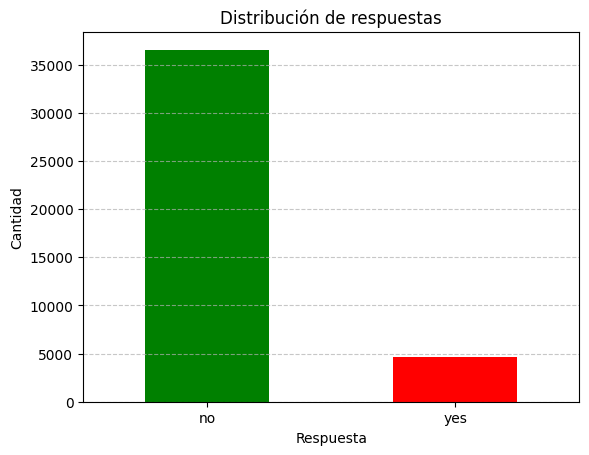

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar respuestas 'Sí' y 'No'
conteo = df['y'].value_counts()

# Crear gráfico de barras
conteo.plot(kind='bar', color=['green', 'red'])

# Agregar título y etiquetas
plt.title("Distribución de respuestas")
plt.xlabel("Respuesta")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

In [7]:
    # Contar cuántos ejemplos hay de cada clase
clase_0 = df[df['y'] == 'no']
clase_1 = df[df['y'] == 'yes']

# Igualar el número de ejemplos por submuestreo (undersampling)
min_len = min(len(clase_0), len(clase_1))
clase_0_eq = clase_0.sample(n=min_len, random_state=42)
clase_1_eq = clase_1.sample(n=min_len, random_state=42)

# Concatenar ambos subconjuntos balanceados
df_balanceado = pd.concat([clase_0_eq, clase_1_eq]).sample(frac=1, random_state=42)  # Mezclar aleatoriamente

# Proceder como antes (selección de columnas, codificación, entrenamiento, etc.)
X = df_balanceado[columnas_usadas]
y = df_balanceado['y']

# Codificar variables categóricas
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y)

# Dividir y aplicar modelos como antes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
min_len

C:\Users\david\AppData\Local\Temp\ipykernel_15492\824114704.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\david\AppData\Local\Temp\ipykernel_15492\824114704.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\david\AppData\Local\Temp\ipykernel_15492\824114704.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

4640

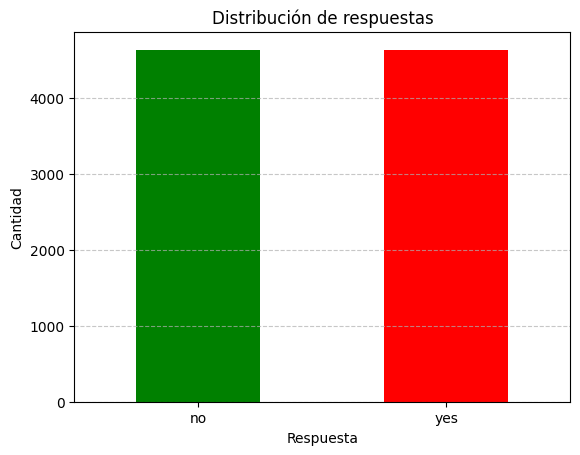

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar respuestas 'Sí' y 'No'
conteo = df_balanceado['y'].value_counts()

# Crear gráfico de barras
conteo.plot(kind='bar', color=['green', 'red'])

# Agregar título y etiquetas
plt.title("Distribución de respuestas")
plt.xlabel("Respuesta")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

Conteo original:
y
no     36548
yes     4640
Name: count, dtype: int64

Conteo después del balanceo:
y
no     4640
yes    4640
Name: count, dtype: int64


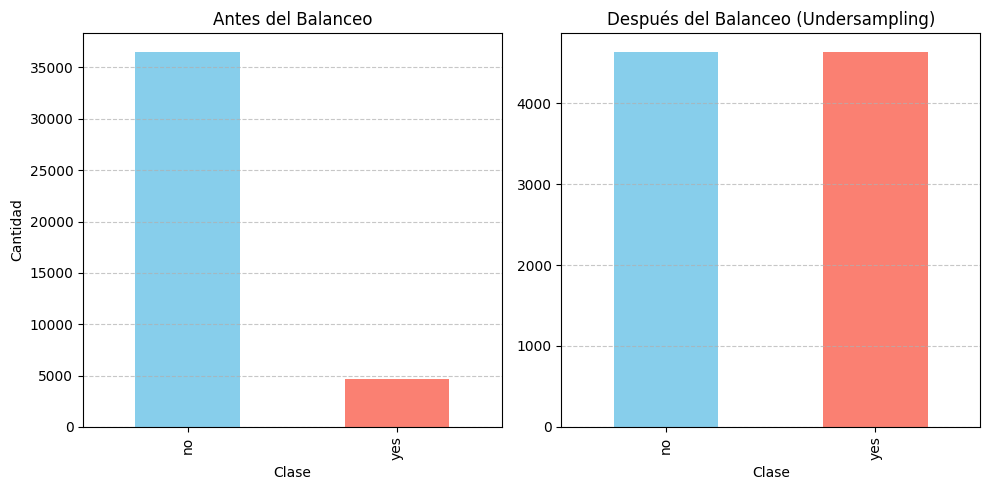

In [9]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt

# Contar clases originales
conteo_original = df['y'].value_counts()

# Mostrar conteo original
print("Conteo original:")
print(conteo_original)

# Separar por clase
clase_0 = df[df['y'] == 'no']
clase_1 = df[df['y'] == 'yes']

# Undersampling
min_len = min(len(clase_0), len(clase_1))
clase_0_eq = clase_0.sample(n=min_len, random_state=42)
clase_1_eq = clase_1.sample(n=min_len, random_state=42)
df_balanceado = pd.concat([clase_0_eq, clase_1_eq]).sample(frac=1, random_state=42)

# Contar clases después del balanceo
conteo_balanceado = df_balanceado['y'].value_counts()

# Mostrar conteo balanceado
print("\nConteo después del balanceo:")
print(conteo_balanceado)

# Gráfico comparativo
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico original
conteo_original.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Antes del Balanceo')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Clase')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['no', 'yes'])

# Gráfico balanceado
conteo_balanceado.plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Después del Balanceo (Undersampling)')
axes[1].set_xlabel('Clase')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['no', 'yes'])

plt.tight_layout()
plt.show()

In [10]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("=== Random Forest ===")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.92      0.84      0.87       931
           1       0.85      0.92      0.88       925

    accuracy                           0.88      1856
   macro avg       0.88      0.88      0.88      1856
weighted avg       0.88      0.88      0.88      1856

Accuracy: 0.8798491379310345


In [11]:
# Regresión Logística
log_model = LogisticRegression(max_iter=1000)  # Se aumenta el número de iteraciones por si tarda en converger
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)

print("=== Regresión Logística ===")
print(classification_report(y_test, log_pred))
print("Accuracy:", accuracy_score(y_test, log_pred))

=== Regresión Logística ===
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       931
           1       0.84      0.86      0.85       925

    accuracy                           0.85      1856
   macro avg       0.85      0.85      0.85      1856
weighted avg       0.85      0.85      0.85      1856

Accuracy: 0.8475215517241379


In [12]:
# SVM
svm_model = SVC()  # Puedes especificar kernel='linear', 'rbf', etc.
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("=== SVM ===")
print(classification_report(y_test, svm_pred))
print("Accuracy:", accuracy_score(y_test, svm_pred))

=== SVM ===
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       931
           1       0.74      0.70      0.72       925

    accuracy                           0.73      1856
   macro avg       0.73      0.73      0.73      1856
weighted avg       0.73      0.73      0.73      1856

Accuracy: 0.7279094827586207
